
# ARIMA and Seasonal ARIMA




In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('perrin-freres-monthly-champagne-.csv')

In [3]:
df.head()

Month  Perrin Freres monthly champagne sales millions ?64-?72
0  1964-01                                             2815.0     
1  1964-02                                             2672.0     
2  1964-03                                             2755.0     
3  1964-04                                             2721.0     
4  1964-05                                             2946.0

In [4]:
df.isnull().sum()

Month                                                     1
Perrin Freres monthly champagne sales millions ?64-?72    2
dtype: int64

In [5]:
df.tail()

Month  \
102                                            1972-07   
103                                            1972-08   
104                                            1972-09   
105                                                NaN   
106  Perrin Freres monthly champagne sales millions...   

     Perrin Freres monthly champagne sales millions ?64-?72  
102                                             4298.0       
103                                             1413.0       
104                                             5877.0       
105                                                NaN       
106                                                NaN

In [6]:
## Cleaning up the data
df.columns=["Month","Sales"]
df.head()

Month   Sales
0  1964-01  2815.0
1  1964-02  2672.0
2  1964-03  2755.0
3  1964-04  2721.0
4  1964-05  2946.0

In [7]:
## Drop last 2 rows
df.drop(106,axis=0,inplace=True)

In [8]:
df.tail()

Month   Sales
101  1972-06  5312.0
102  1972-07  4298.0
103  1972-08  1413.0
104  1972-09  5877.0
105      NaN     NaN

In [9]:
df.drop(105,axis=0,inplace=True)

In [10]:
df.tail()

Month   Sales
100  1972-05  4618.0
101  1972-06  5312.0
102  1972-07  4298.0
103  1972-08  1413.0
104  1972-09  5877.0

In [11]:
df.isnull().sum()

Month    0
Sales    0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   105 non-null    object 
 1   Sales   105 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.8+ KB


In [13]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [14]:
df.head()

Month   Sales
0 1964-01-01  2815.0
1 1964-02-01  2672.0
2 1964-03-01  2755.0
3 1964-04-01  2721.0
4 1964-05-01  2946.0

In [15]:
df.set_index('Month',inplace=True)

In [16]:
df.head()

Sales
Month             
1964-01-01  2815.0
1964-02-01  2672.0
1964-03-01  2755.0
1964-04-01  2721.0
1964-05-01  2946.0

In [17]:
df.describe()

Sales
count    105.000000
mean    4761.152381
std     2553.502601
min     1413.000000
25%     3113.000000
50%     4217.000000
75%     5221.000000
max    13916.000000

## Step 2: Visualize the Data

<Axes: xlabel='Month'>

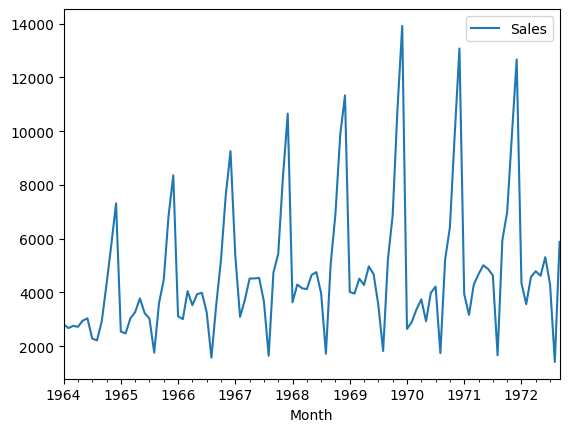

In [18]:
df.plot()
# plt.show()

In [19]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [20]:
test_result=adfuller(df['Sales'])

In [21]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [22]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276195
p-value : 0.3639157716602467
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Differencing

In [23]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [24]:
df['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [25]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [26]:
df.head(14)

Sales  Sales First Difference  Seasonal First Difference
Month                                                                
1964-01-01  2815.0                     NaN                        NaN
1964-02-01  2672.0                  -143.0                        NaN
1964-03-01  2755.0                    83.0                        NaN
1964-04-01  2721.0                   -34.0                        NaN
1964-05-01  2946.0                   225.0                        NaN
1964-06-01  3036.0                    90.0                        NaN
1964-07-01  2282.0                  -754.0                        NaN
1964-08-01  2212.0                   -70.0                        NaN
1964-09-01  2922.0                   710.0                        NaN
1964-10-01  4301.0                  1379.0                        NaN
1964-11-01  5764.0                  1463.0                        NaN
1964-12-01  7312.0                  1548.0                        NaN
1965-01-01  2541.0                 -4771.0                     -274.0
1965-02-01  2475.0                   -66.0                     -197.0

In [27]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213166
p-value : 2.0605796968136632e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Month'>

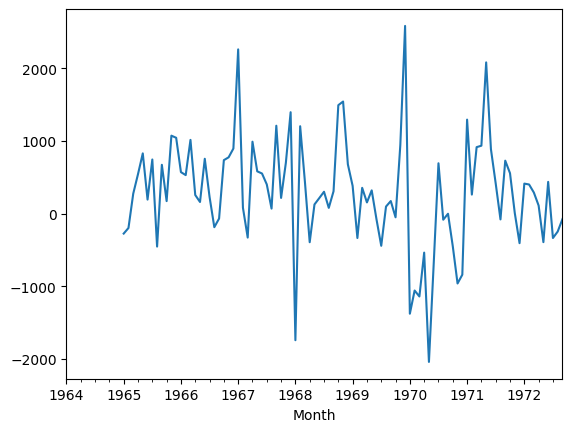

In [28]:
df['Seasonal First Difference'].plot()

## Auto Regressive Model
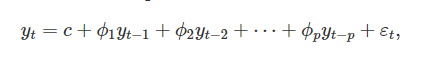

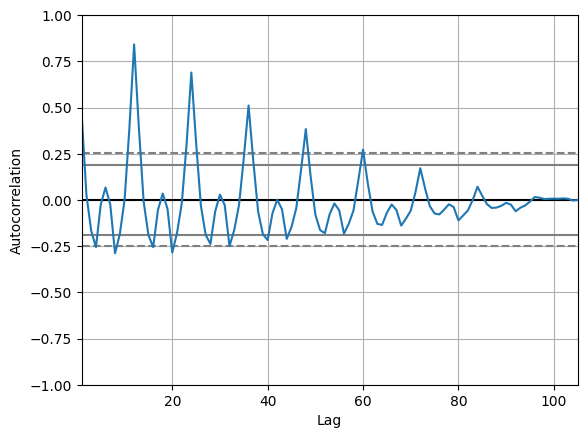

In [29]:
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt

autocorrelation_plot(df['Sales'])
plt.show()


### Final Thoughts on Autocorrelation and Partial Autocorrelation

* Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model.  The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point.  Put another way, the number of non-zero partial autocorrelations gives the order of the AR model.  By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
    
    
* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner.  A clearer pattern for an MA model is in the ACF.  The ACF will have non-zero autocorrelations only at lags involved in the model.
    
    p,d,q
    p AR model lags
    d differencing
    q MA lags

In [30]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

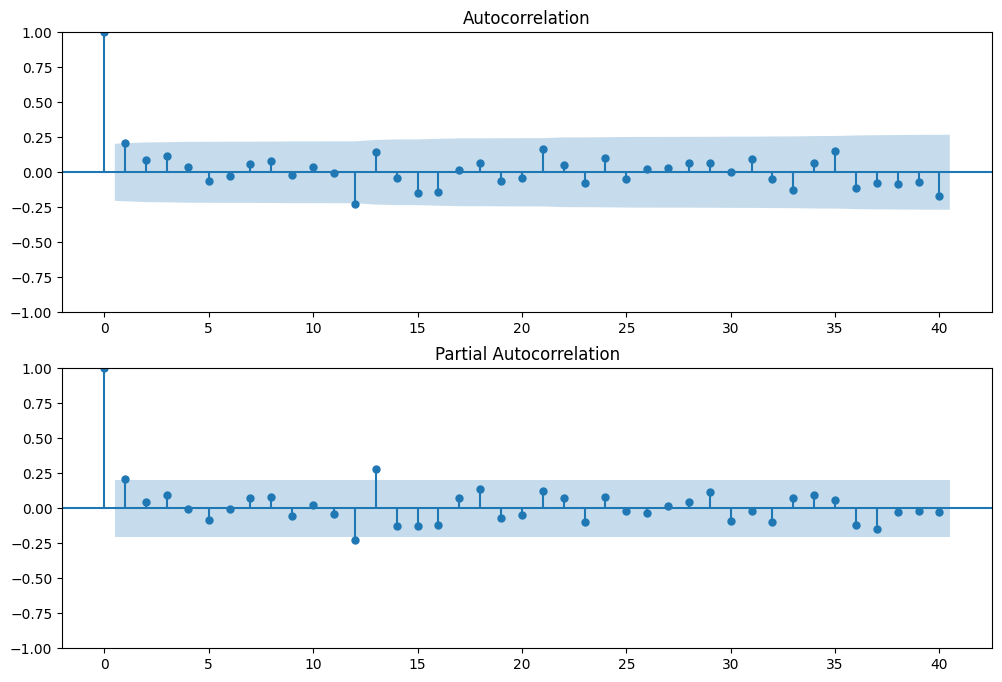

In [31]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [32]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima.model import ARIMA

In [33]:
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()


c:\Users\Admin\anaconda3\envs\mlenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Admin\anaconda3\envs\mlenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Admin\anaconda3\envs\mlenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [34]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Fri, 18 Oct 2024   AIC                           1911.627
Time:                        23:23:08   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      3.999      0.000       0.232       0.677
ma.L1         -0.9666      0.056    -17.316      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.473      0.000    4.02e+06    6.43e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Month'>

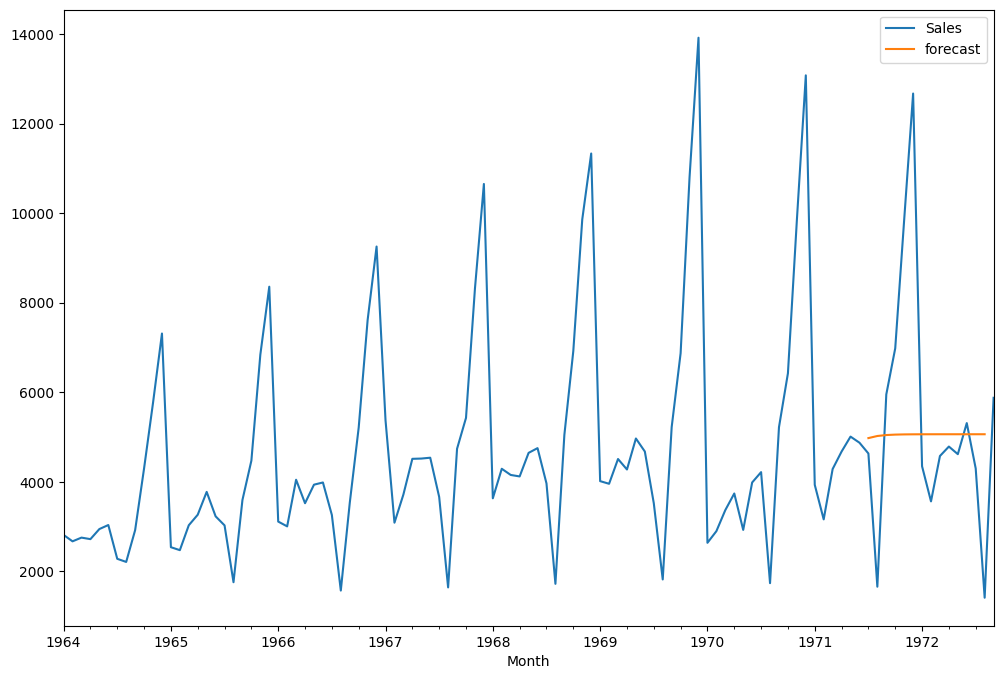

In [35]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [36]:
import statsmodels.api as sm

In [37]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

c:\Users\Admin\anaconda3\envs\mlenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Admin\anaconda3\envs\mlenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Month'>

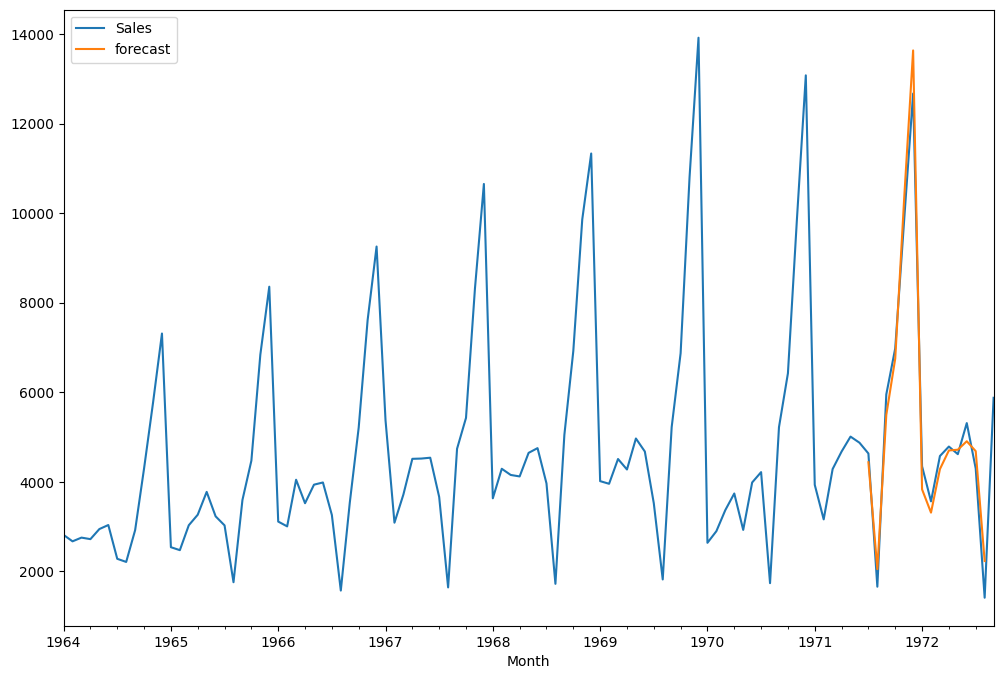

In [38]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [39]:
df.tail()

Sales  Sales First Difference  Seasonal First Difference  \
Month                                                                   
1972-05-01  4618.0                  -170.0                     -392.0   
1972-06-01  5312.0                   694.0                      438.0   
1972-07-01  4298.0                 -1014.0                     -335.0   
1972-08-01  1413.0                 -2885.0                     -246.0   
1972-09-01  5877.0                  4464.0                      -74.0   

               forecast  
Month                    
1972-05-01  4717.511518  
1972-06-01  4906.404338  
1972-07-01  4685.437050  
1972-08-01  2232.408793  
1972-09-01          NaN

In [40]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]
future_dates

[Timestamp('1972-09-01 00:00:00'),
 Timestamp('1972-10-01 00:00:00'),
 Timestamp('1972-11-01 00:00:00'),
 Timestamp('1972-12-01 00:00:00'),
 Timestamp('1973-01-01 00:00:00'),
 Timestamp('1973-02-01 00:00:00'),
 Timestamp('1973-03-01 00:00:00'),
 Timestamp('1973-04-01 00:00:00'),
 Timestamp('1973-05-01 00:00:00'),
 Timestamp('1973-06-01 00:00:00'),
 Timestamp('1973-07-01 00:00:00'),
 Timestamp('1973-08-01 00:00:00'),
 Timestamp('1973-09-01 00:00:00'),
 Timestamp('1973-10-01 00:00:00'),
 Timestamp('1973-11-01 00:00:00'),
 Timestamp('1973-12-01 00:00:00'),
 Timestamp('1974-01-01 00:00:00'),
 Timestamp('1974-02-01 00:00:00'),
 Timestamp('1974-03-01 00:00:00'),
 Timestamp('1974-04-01 00:00:00'),
 Timestamp('1974-05-01 00:00:00'),
 Timestamp('1974-06-01 00:00:00'),
 Timestamp('1974-07-01 00:00:00'),
 Timestamp('1974-08-01 00:00:00')]

In [41]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [42]:
future_datest_df.tail()

Sales Sales First Difference Seasonal First Difference forecast
1974-04-01   NaN                    NaN                       NaN      NaN
1974-05-01   NaN                    NaN                       NaN      NaN
1974-06-01   NaN                    NaN                       NaN      NaN
1974-07-01   NaN                    NaN                       NaN      NaN
1974-08-01   NaN                    NaN                       NaN      NaN

In [43]:
future_df=pd.concat([df,future_datest_df])

C:\Users\Admin\AppData\Local\Temp\ipykernel_14044\1723908026.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_df=pd.concat([df,future_datest_df])


In [44]:
future_df

Sales  Sales First Difference  Seasonal First Difference  \
1964-01-01  2815.0                     NaN                        NaN   
1964-02-01  2672.0                  -143.0                        NaN   
1964-03-01  2755.0                    83.0                        NaN   
1964-04-01  2721.0                   -34.0                        NaN   
1964-05-01  2946.0                   225.0                        NaN   
...            ...                     ...                        ...   
1974-04-01     NaN                     NaN                        NaN   
1974-05-01     NaN                     NaN                        NaN   
1974-06-01     NaN                     NaN                        NaN   
1974-07-01     NaN                     NaN                        NaN   
1974-08-01     NaN                     NaN                        NaN   

            forecast  
1964-01-01       NaN  
1964-02-01       NaN  
1964-03-01       NaN  
1964-04-01       NaN  
1964-05-01       NaN  
...              ...  
1974-04-01       NaN  
1974-05-01       NaN  
1974-06-01       NaN  
1974-07-01       NaN  
1974-08-01       NaN  

[128 rows x 4 columns]

<Axes: >

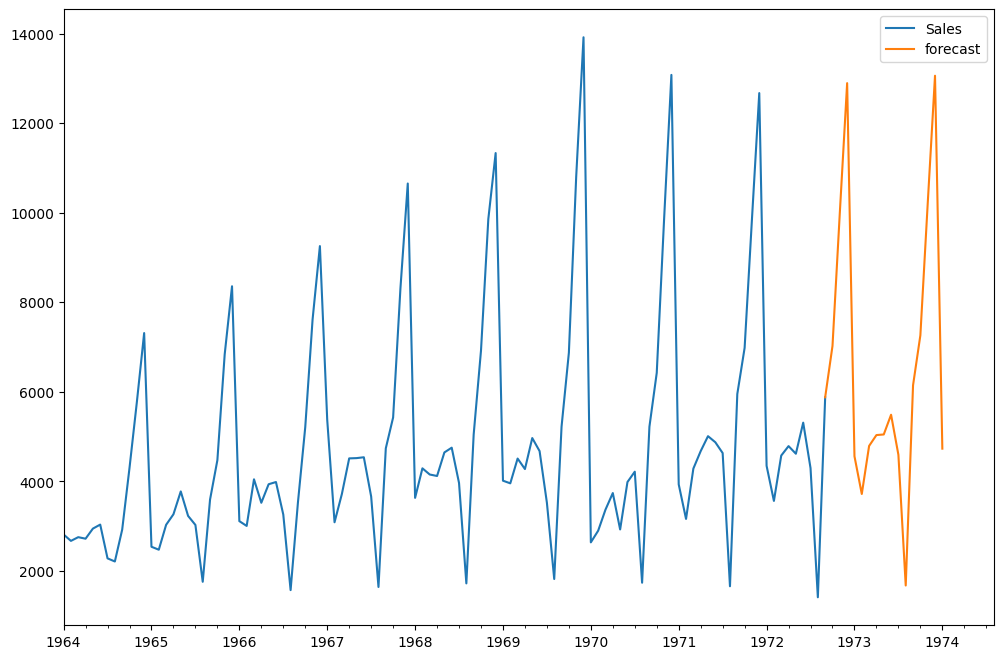

In [45]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 